# Classification w/ Gradient Descent & Backprop

In [ ]:
#Example modified from http://cs231n.github.io/neural-networks-case-study/

#Imports 
import numpy as np #Represent ndarrays a.k.a. tensors
import matplotlib.pyplot as plt #For plotting
np.random.seed(0) #For repeatability of the experiment
import pickle #To read data for this experiment

### Generating the data with 100 data points per class to a total of 300 rows and 2 independent variables and one dependent variable

In [53]:
########### Create data #####################
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    
print("Independent variables First 10 entries \n ", X[:10])
print("\nTarget Variable First 10 entries \n",y[:10])

Independent variables First 10 entries 
  [[0.         0.        ]
 [0.00108586 0.01004248]
 [0.00044325 0.02019716]
 [0.00414908 0.03001764]
 [0.00158322 0.04037301]
 [0.01762969 0.04732815]
 [0.02455754 0.05540778]
 [0.01800173 0.0683771 ]
 [0.04823464 0.06483336]
 [0.06096695 0.06743511]]

Target Variable First 10 entries 
 [0 0 0 0 0 0 0 0 0 0]


### Split the data into train and test data. We have 80% of data in train and 20% in test. The split is based on random sampling of data

In [54]:
### Train test split ###
sample_size = 0.8
rows = X.shape[0]
indices = np.linspace(1,rows,rows).astype(int)
train_ind = random.sample(range(1,rows),int(sample_size*rows))
test_ind = list(set(range(1,rows)).difference(set(train_ind)))

X_train = X[train_ind,]
Y_train = y[train_ind,]

X_test = X[test_ind,]
Y_test = y[test_ind,]

We have a built a linear classifier using multi class logistic loss and L2 regularization. We created a function called gradient descent is created below which takes input data with parameters like regularization,leanring_rate and returns the optimized weights and bias values. Weights will be in 2X3 dimension and bias will be in 1X3 dimension.

After training this model we got 54% training accuracy and 50% test accuracy. 

In [75]:
def gradient_descent(X_train,Y_train,reg,D,K,step_size):
    ######## Gradient Descent ###########
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    #For simplicity we will take the batch size to be the same as number of examples
    num_examples = X_train.shape[0]

    #Initial value for the Gradient Descent Parameter

    # gradient descent loop
    for i in range(1000):

        # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),Y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        #if i % 10 == 0:
        #    print("iteration: "+str(i) +" loss: "+str(loss))

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),Y_train] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += reg*W # regularization gradient

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
        
    return [W,b]

In [61]:
####### Intializing the variables #########
# Initial values from hyperparameter
reg = 1e-3 # regularization strength
step_size = 1e-0 #Also called learning rate
[W,b] = gradient_descent(X_train,Y_train,reg,D,K,step_size) #Calling Gradient Descent Function 
 
print("\n Weights Shape\t \n",W.shape)
print("\n Weights \t \n",W)
print("\n Bias Shape \n",b.shape)
print("\n Bias \n",b)


 Weights Shape	 
 (2, 3)

 Weights 	 
 [[ 1.11321176  1.39174265 -2.51689619]
 [-2.59445609  3.06705747 -0.46714678]]

 Bias Shape 
 (1, 3)

 Bias 
 [[ 0.02756673 -0.11647347  0.08890674]]


In [62]:
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print("Training Accuracy:  ", str(np.round(np.mean(predicted_class == Y_train)*100,2))+"%")

scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print("Test Accuracy: \t",str(np.round(np.mean(predicted_class == Y_test)*100,2))+"%")

Training Accuracy:   54.17%
Test Accuracy: 	 50.85%


Training Prediction Plot


(-1.8825794778769303, 1.897420522123073)

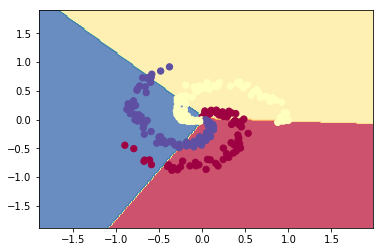

In [63]:
## Training prediction plot
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=40, cmap=plt.cm.Spectral)
print("Training Prediction Plot")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

Test Accuracy Plot


(-1.8458587137187035, 1.9141412862812999)

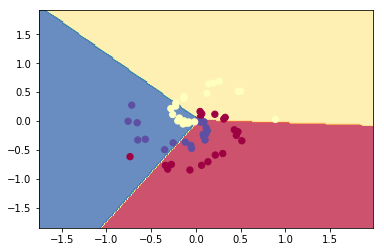

In [64]:
## Test prediction plot
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=40, cmap=plt.cm.Spectral)
print("Test Accuracy Plot")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# K-fold Cross Validation 
   

Since the size of data is very small(300 examples) model performed very poorly for smaller values of K. Hence we resorted to leave one out cross validation where K=300 and obtained cross validation accuracy of 52% . In this model we have constant learning rate of 1e-0 and regularization of 1e-3.

In [66]:
### K-fold Cross Validation 
# Choose K values 
K_errors = []
index = []
for j in range(1,300):
    if 300%(j+1)==0:
        kfolds_train = np.split(X,j+1)
        kfolds_class = np.split(y,j+1)
        cv_errors = np.zeros(j+1)
        for i in range(0,j+1): 
            train_cv = [x for j,x in enumerate(kfolds_train) if j!=i]
            train_target = [x for j,x in enumerate(kfolds_class) if j!=i]

            train_cv = np.concatenate(train_cv)
            train_target= np.concatenate(train_target)

            test_cv = kfolds_train[i]
            test_target = kfolds_class[i]
            [W,b] = gradient_descent(train_cv,train_target,reg,D,K,step_size)

            #validation accuracy 
            scores = np.dot(test_cv, W) + b
            predicted_class = np.argmax(scores, axis=1)
            cv_errors[i] = np.mean(predicted_class == test_target)    
        K_errors.append(cv_errors.mean())
        index.append(j)

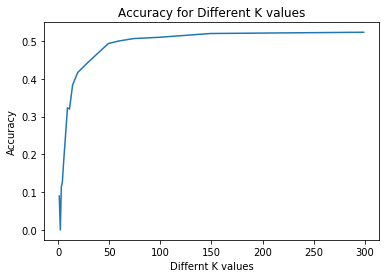

In [67]:
plt.plot(index,K_errors)
plt.title("Accuracy for Different K values")
plt.xlabel("Differnt K values")
plt.ylabel("Accuracy")
plt.show()

# Finding Optimal Learning Rates

In this rate we iterate over different learning rate and different iterations to find optimal rates. We found that different learning rates. If the learning rate is too small then performance of model was suboptimal indicating that gradient descent didn't reach any minima. 

In our example we obtained the accuracy of 50% for learning rate of 0.1 and 70% for learning rate of 10. For this particular example number of iterations didn't produce any significant changes in the model performance. For learning rate 10, Model with 500 iterations had accuracy of 79% and model with 1000 iterations gave accuracy 80%

In [70]:
Learning_rate = [1e-3,1e-2,1e-1,1e0,1e1]
folds=300
errors = np.zeros(len(Learning_rate))
sensitivity = np.zeros(len(Learning_rate))
for l in range(0,len(Learning_rate)):
    cv_errors = np.zeros(folds)
    for i in range(0,folds): 
        train_cv = [x for j,x in enumerate(kfolds_train) if j!=i]
        train_target = [x for j,x in enumerate(kfolds_class) if j!=i]

        train_cv = np.concatenate(train_cv)
        train_target= np.concatenate(train_target)

        test_cv = kfolds_train[i]
        test_target = kfolds_class[i]
        [W,b] = gradient_descent(train_cv,train_target,reg,D,K,Learning_rate[l])

        #validation accuracy 
        scores = np.dot(test_cv, W) + b
        predicted_class = np.argmax(scores, axis=1)
        cv_errors[i] = np.mean(predicted_class == test_target)    
    errors[l] = cv_errors.mean()

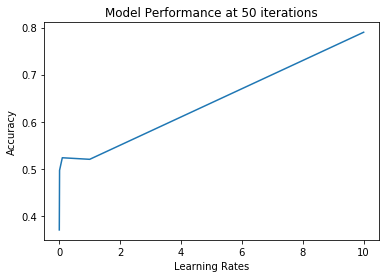

In [71]:
plt.plot(Learning_rate,errors)
plt.title("Model Performance at 50 iterations")
plt.xlabel("Learning Rates")
plt.ylabel("Accuracy")
plt.show()

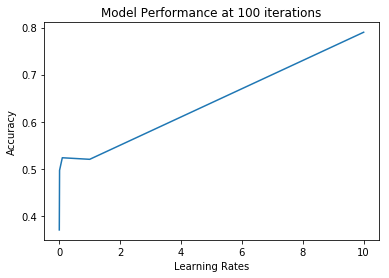

In [76]:
plt.plot(Learning_rate,errors)
plt.title("Model Performance at 100 iterations")
plt.xlabel("Learning Rates")
plt.ylabel("Accuracy")
plt.show()

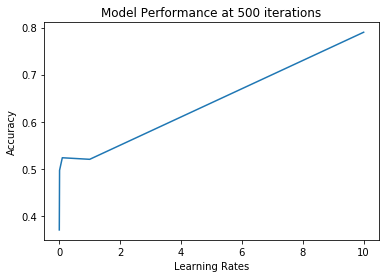

In [73]:
plt.plot(Learning_rate,errors)
plt.title("Model Performance at 500 iterations")
plt.xlabel("Learning Rates")
plt.ylabel("Accuracy")
plt.show()

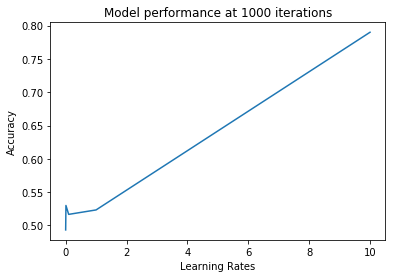

In [84]:
plt.plot(Learning_rate,errors)
plt.title("Model performance at 1000 iterations")
plt.xlabel("Learning Rates")
plt.ylabel("Accuracy")
plt.show()

Question 4.6 - Part A

In [96]:
learning_rate = 1e1
regularization = [1e-3,1e-2,1e-1,1e0,1e1]
folds=300
errors=np.zeros(len(regularization))
for l in range(0,len(regularization)):
    cv_errors = np.zeros(folds)
    for i in range(0,folds): 
        train_cv = [x for j,x in enumerate(kfolds_train) if j!=i]
        train_target = [x for j,x in enumerate(kfolds_class) if j!=i]

        train_cv = np.concatenate(train_cv)
        train_target= np.concatenate(train_target)

        test_cv = kfolds_train[i]
        test_target = kfolds_class[i]
        [W,b] = gradient_descent(train_cv,train_target,regularization[l],D,K,learning_rate)

        #validation accuracy 
        scores = np.dot(test_cv, W) + b
        predicted_class = np.argmax(scores, axis=1)
        cv_errors[i] = np.mean(predicted_class == test_target)    
    errors[l] = cv_errors.mean()

/home/gughan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/gughan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


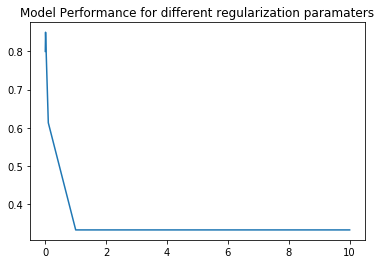

In [97]:
plt.plot(regularization,errors)
plt.title("Model Performance for different regularization paramaters")
plt.show()

# Training final model with optimal parameters w/ Regularization"

Model Regularization has test accuracy of 54.24% where as model without regularization has test accuracy of 50.85% which shows the need for optimal regularization rate .

In [58]:
learning_rate = 1e1
reg= 1e-2
[W,b] = gradient_descent(X_train,Y_train,reg,D,K,learning_rate)

Model Peformance with Regularization
Training Accuracy:   57.92%
Test Accuracy: 	 54.24%
Test Accuracy Plot


(-1.8458587137187035, 1.9141412862812999)

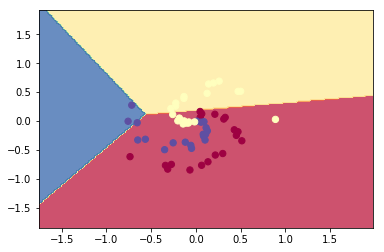

In [59]:
##### Model Performance with Regularization 
print("Model Peformance with Regularization")
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print("Training Accuracy:  ", str(np.round(np.mean(predicted_class == Y_train)*100,2))+"%")

scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print("Test Accuracy: \t",str(np.round(np.mean(predicted_class == Y_test)*100,2))+"%")

## Test prediction plot
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=40, cmap=plt.cm.Spectral)
print("Test Accuracy Plot")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Training final model with optimal parameters w/o Regularization

Model Performance without Regularization
Training Accuracy:   54.17%
Test Accuracy: 	 50.85%
Test Accuracy Plot


(-1.8458587137187035, 1.9141412862812999)

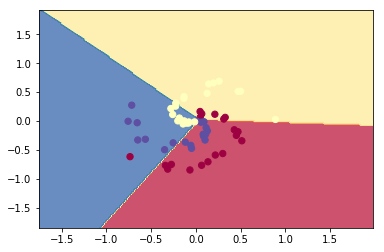

In [60]:
# Model Performance without Regularization
reg= 0 #regularization set to zero
[W,b] = gradient_descent(X_train,Y_train,reg,D,K,step_size)
print("Model Performance without Regularization")
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print("Training Accuracy:  ", str(np.round(np.mean(predicted_class == Y_train)*100,2))+"%")

scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print("Test Accuracy: \t",str(np.round(np.mean(predicted_class == Y_test)*100,2))+"%")

## Test prediction plot
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=40, cmap=plt.cm.Spectral)
print("Test Accuracy Plot")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Building Model with 50-50 train-test split with optimal parameters

Train test split of 80-20 gave test acc"uracy of 54% where as 50-50 split gave 52.35% accuracy. Having more training data increases the diversity and results in better generalization performance which is shown in the model performance 

In [148]:
### Train test split by 50% ###
sample_size = 0.5
rows = X.shape[0]
indices = np.linspace(1,rows,rows).astype(int)
train_ind = random.sample(range(1,rows),int(sample_size*rows))
test_ind = list(set(range(1,rows)).difference(set(train_ind)))

X_train = X[train_ind,]
Y_train = y[train_ind,]

X_test = X[test_ind,]
Y_test = y[test_ind,]
learning_rate = 1e1
reg= 1e-2
[W,b] = gradient_descent(X_train,Y_train,reg,D,K,learning_rate)
print("Model Performance at 50-50 split")
scores = np.dot(X_train, W) + b
predicted_class = np.argmax(scores, axis=1)
print("Training Accuracy:  ", str(np.round(np.mean(predicted_class == Y_train)*100,2))+"%")

scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print("Test Accuracy: \t",str(np.round(np.mean(predicted_class == Y_test)*100,2))+"%")

Model Performance at 50-50 split
Training Accuracy:   54.0%
Test Accuracy: 	 52.35%
